# Big Data Real-Time Analytics Com Python e Spark Versão 3.0

## José Aleilson - Projeto com Feedback 3

# Introdução 

Este projeto tem como objetivo analisar os dados de acidentes que ocorrem no transporte público. Alguns dos objetivos são compreender qual o acidente mais frequente, qual a faixa etária mais afetada e quais são as características das vítimas que sofrem acidentes.

Para alcançar esses objetivos, serão utilizadas ferramentas de análise de dados. O objetivo é responder a essas perguntas e outras que possam auxiliar na tomada de decisão para futuras medidas com o objetivo de prevenir acidentes no transporte público.

Com essas informações, espera-se gerar insights valiosos para o desenvolvimento de estratégias mais eficazes de prevenção de acidentes no transporte público, visando melhorar a segurança dos usuários.

# Metodologia

## Coleta de dados 

Os dados dos acidentes no transporte público de Londres serão coletados do arquivo "TFL Bus Safety.xlsx" referente aos anos de 2015 a 2018.

## Visualização de dados

Serão utilizadas ferramentas de visualização de dados, como o Matplotlib e Seaborn, para a criação de gráficos e visualizações que ajudem na compreensão dos resultados e na apresentação dos insights gerados.

## Implementação

Uma das recomendações sugeridas foi a construção do projeto utilizando a linguagem Python e a linguagem SQL. Portanto, a implementação das análises será realizada utilizando essas ferramentas.

## Carga das bibliotecas 

In [1]:
# Carregando pacotes
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

## Carga dos dados 

In [2]:
# Carregando dataframe
df = pd.read_excel('TFL Bus Safety.xlsx')

In [3]:
# Criando uma conexão com o DataFrame
pysqldf = lambda q: sqldf(q, globals())

# Análise dos dados

Serão utilizadas ferramentas de análise de dados para responder as perguntas propostas no objetivo do projeto, como identificar o tipo de acidente mais frequente, a faixa etária mais afetada e as características das vítimas que sofrem acidentes. Além disso, outras análises serão realizadas para gerar insights valiosos para o desenvolvimento de estratégias de prevenção de acidentes no transporte público.

## Qual a quantidade de incidentes por gênero?

In [4]:
# Executando consulta SQL
query = '''
        SELECT 
            "Victims Sex" AS Sex, 
            COUNT(*) AS Victims 
        FROM 
            df 
        GROUP BY 
            "Victims Sex"
        ORDER BY 
            Victims 
                DESC
        '''

resultado = pysqldf(query)

# Exibindo os resultados
print(resultado.head())


       Sex  Victims
0   Female    11847
1     Male     7709
2  Unknown     3602


Observando os resultados da query, vemos que a maioria dos incidentes aconteceram com pessoas do gênero feminino:

- Cerca de **11.847** vítimas são do gênero **feminino**;
- As vítimas do gênero **masculino** são **7.709**;
- E cerca de **3.602** vítimas não possuem informação de gênero.

Vejamos o gráfico a seguir para melhor visualização.

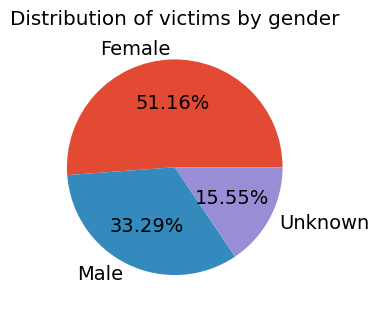

In [5]:
# Aplicando o tema "ggplot"
style.use('ggplot')
# Criando a figura e definindo o tamanho 
fig, ax = plt.subplots(figsize=(5, 3.5))
# Criando o gráfico de pizza com labels e tamanho da fonte
ax.pie(resultado.Victims, labels=resultado.Sex, autopct='%1.2f%%', textprops={'fontsize': 14})
# Adicionando um título ao gráfico
ax.set_title('Distribution of victims by gender')
# Exibindo o gráfico
plt.show()


Analisando o gráfico de pizza acima, fica claro que a maior parte das vítimas são do gênero **feminino**, representando **51,16%** dos gêneros das vítimas que sofreram algum tipo de incidente. Já o gênero **masculino** representa **33,29%** das vítimas que sofreram algum incidente nesse período, e **15,55%** não possuem informações sobre o gênero.

## Qual faixa etária esteve mais envolvida nos incidentes?

In [6]:
# Executando consulta SQL
query2 = '''
        SELECT 
            "Victims Age" AS "Age Group", 
            COUNT (*) AS Victims 
        FROM 
            df 
        GROUP BY 
            "Victims Age"
        ORDER BY 
            Victims 
                DESC
        '''

resultado2 = pysqldf(query2)

# Exibindo o resultado
print(resultado2)

  Age Group  Victims
0     Adult    10754
1   Unknown     7135
2   Elderly     2769
3     Child     2181
4     Youth      319


É possível ver no resultado da query acima o número de vítimas por faixa etária:

- Os **adultos** são as vítimas que mais sofreram algum tipo de incidente. Eles representam cerca de **10.754 vítimas**;
- A segunda maior contabilização de vítimas **não tem sua faixa etária informada**, totalizando **7.135 vítimas**;
- O grupo que menos sofreu algum tipo de incidente foram os **jovens**. Estes representam um total de **319 vítimas**.

Vejamos o gráfico a seguir para melhor visualização dessas informações.

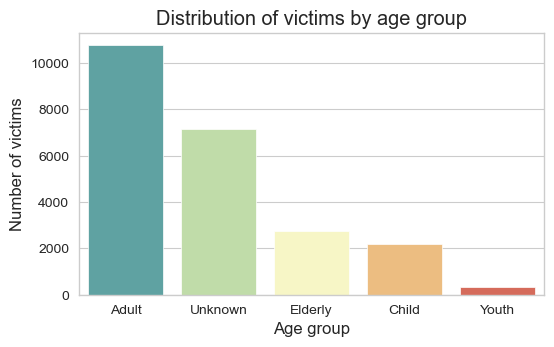

In [24]:
# Criando gráfico
plt.subplots(figsize=(6, 3.4))
sns.set_style("whitegrid")
sns.barplot(x='Age Group', y='Victims', data=resultado2, palette='Spectral_r')
# Adicionando um título e legendas
plt.title('Distribution of victims by age group')
plt.xlabel('Age group')
plt.ylabel('Number of victims')
plt.show()

Ao analisar o gráfico de barras acima, é possível ver que as vítimas consideradas adultas foram o grupo que mais contabilizou incidentes, totalizando um número superior a 10.000 vítimas. Já os grupos dos idosos e crianças apresentaram um número de vítimas inferior a 3.000. E os jovens foram os que menos contabilizaram algum tipo de incidente nesse período de estudo.

## Qual o percentual de incidentes por tipo de evento (Incident Event Type)?

In [8]:
# Executando consulta SQL
query3 = '''
        SELECT 
            "Incident Event Type", 
            COUNT(*) AS Count, 
            ROUND(COUNT(*)*100.0/(SELECT COUNT(*) FROM df), 2) AS Percentual
        FROM 
            df
        GROUP BY 
            "Incident Event Type"
        ORDER BY 
            Count 
                DESC
        '''

resultado3 = pysqldf(query3)

# Exibindo os resultados
print(resultado3)

       Incident Event Type  Count  Percentual
0           Slip Trip Fall   6981       30.15
1         Onboard Injuries   6563       28.34
2          Personal Injury   4596       19.85
3       Collision Incident   4166       17.99
4                  Assault    590        2.55
5  Activity Incident Event    114        0.49
6    Vandalism Hooliganism     73        0.32
7  Safety Critical Failure     66        0.28
8                     Fire      6        0.03
9                  Robbery      3        0.01


Observando os resultados sobre o percentual por tipo de incidente na query acima, vemos:

- **Slip Trip Falls** - que representam os incidentes como escorregões, tropeços ou quedas. Esses são aproximadamente 30% do total de incidentes.
- **Onboard Injuries** - São as lesões que ocorreram a bordo do veículo, que nesse caso são os transportes públicos. Esse tipo de incidente representa aproximadamente 28% do total.
- **Robbery** e **Fire** - são os incidentes com menor ocorrência. O primeiro se refere aos roubos com ameaças ou uso de força e o segundo faz referência a incidentes com fogo.

Eventos com algum tipo de violência física são os com menores ocorrências.


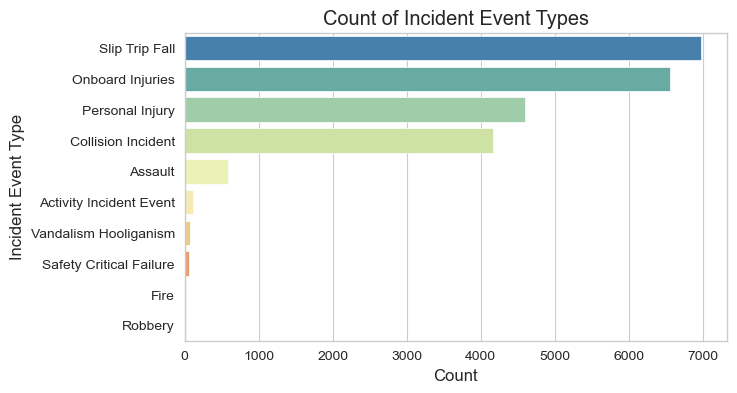

In [9]:
# Criando o gráfico de barras horizontais
plt.subplots(figsize=(7, 4))
sns.set_style("whitegrid")
sns.barplot(x='Count', y='Incident Event Type', data=resultado3, palette='Spectral_r')
# Adicionando rótulos e título
plt.xlabel('Count')
plt.ylabel('Incident Event Type')
plt.title('Count of Incident Event Types')
# Exibindo o gráfico
plt.show()

Os acidentes com escorregões, tropeços e quedas são os que apresentam a maior contagem de vítimas, seguidos pelos acidentes que ocorrem com as vítimas que estão a bordo do transporte público, os danos pessoais e os acidentes por colisões.

## Como foi a evolução de incidentes por mês ao longo do tempo?

In [10]:
# Executando consulta SQL
query4 = '''
    SELECT 
        strftime('%m', "Date Of Incident") AS mes,
        strftime('%Y', "Date Of Incident") AS ano,
        strftime('%m-%Y', "Date Of Incident") AS data,
        COUNT(*) AS num_acidentes
    FROM 
        df
    GROUP BY 
        mes, ano
    ORDER BY 
        ano, mes
        '''

resultado4 = pysqldf(query4)

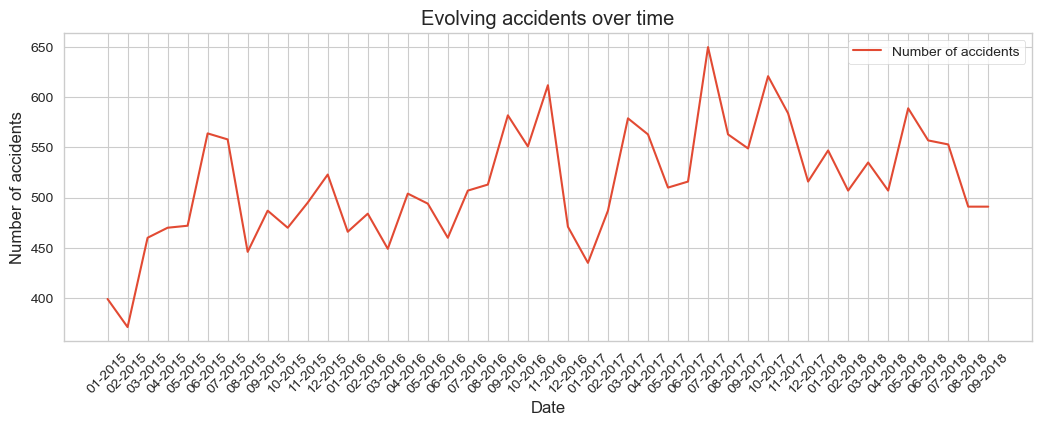

In [11]:
# Definindo o tema
sns.set_style("whitegrid")
# Criando o gráfico
fig, ax = plt.subplots(figsize=(12.5, 4))
ax.plot(resultado4['data'], resultado4['num_acidentes'])
# Definindo o título e rótulos nos eixos
ax.set_title('Evolving accidents over time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of accidents')
# Personalizando o eixo x
ax.set_xticks(resultado4.index)
ax.set_xticklabels(resultado4['data'], rotation=45)
# Adicionando legenda
ax.legend(['Number of accidents'])


plt.show()

Ao observar o gráfico de linhas sobre a trajetória dos acidentes ao longo do tempo, podemos notar que o maior pico foi observado em julho de 2017 e o menor número de incidentes foi registrado em fevereiro de 2015. O maior pico contabilizou cerca de 650 vítimas e o menor, 371.

Além disso, em comparação com os anos de 2015 e 2016, o ano de 2017 apresentou patamares mais altos no número de incidentes, tendo uma tendência crescente a partir de janeiro de 2017.

## Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?

In [12]:
# Executando consulta SQL
query5 = '''
    SELECT 
        strftime('%m', "Date Of Incident") AS mes,
        COUNT(*) AS num_acidentes
    FROM 
        df
    WHERE
        "Victims Sex" = 'Female' AND
        "Incident Event Type" = 'Collision Incident' 
    GROUP BY 
        mes
    ORDER BY 
        mes 
            ASC
'''

resultado5 = pysqldf(query5)

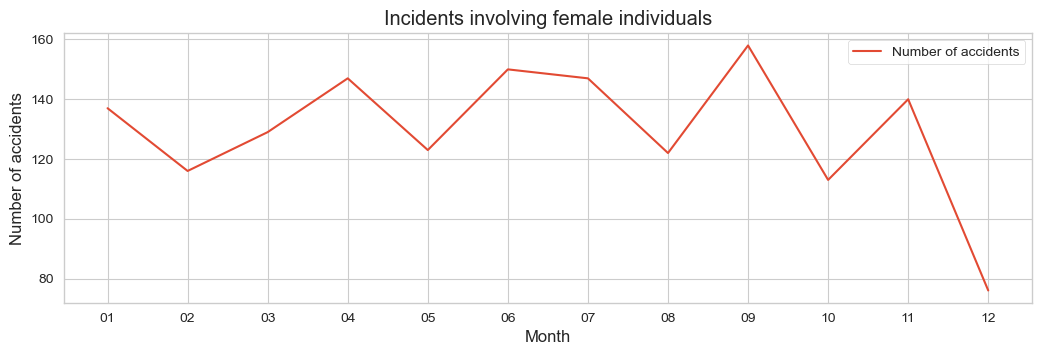

In [13]:
# Definindo o tema
sns.set_style("whitegrid")
# Criando o gráfico
fig, ax = plt.subplots(figsize=(12.5, 3.5))
ax.plot(resultado5['mes'], resultado5['num_acidentes'])
# Definindo o título e rótulos nos eixos
ax.set_title('Incidents involving female individuals')
ax.set_xlabel('Month')
ax.set_ylabel('Number of accidents')
# Adicionando legenda
ax.legend(['Number of accidents'])


plt.show()

Durante a maior parte da série observada, o número de incidentes envolvendo pessoas do gênero feminino manteve-se entre 110 e 130 vítimas contabilizadas. No entanto, em setembro, o número de vítimas aproximou-se de 160, sendo esse o maior pico observado, enquanto em dezembro, o número ficou abaixo das 80 vítimas contabilizadas.

## Qual foi a média de incidentes por mês envolvendo crianças (Child)?

In [14]:
# Executando consulta SQL
query6 = '''
    SELECT 
        strftime('%m-%Y', "Date Of Incident") AS Data,
        AVG(CASE WHEN "Victims Age" = 'Child' THEN 1.0 ELSE 0.0 END) AS avg_child_incidents
    FROM 
        df
    GROUP BY 
        strftime('%Y-%m', "Date Of Incident")
'''

resultado6 = pysqldf(query6)

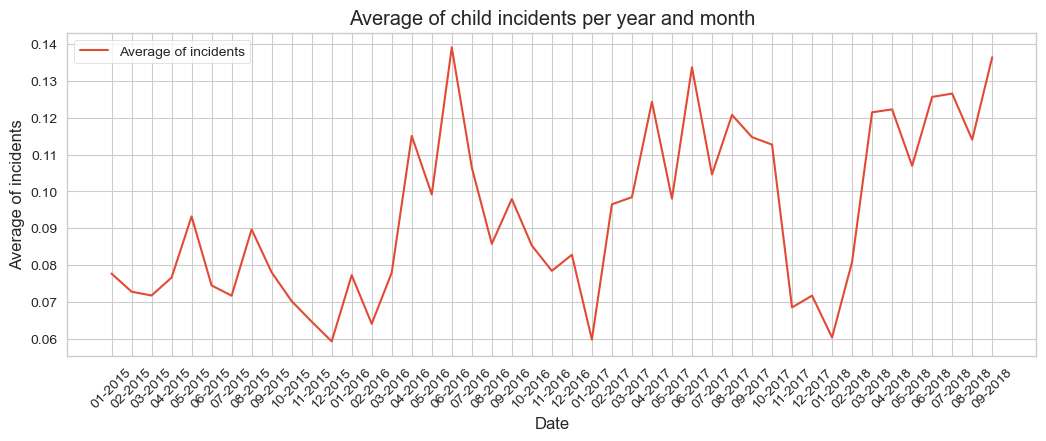

In [15]:
# Definindo o tema
sns.set_style("whitegrid")
# Criando o gráfico
fig, ax = plt.subplots(figsize=(12.5, 4.2))
ax.plot(resultado6['Data'], resultado6['avg_child_incidents'])
# Definindo o título e rótulos nos eixos
ax.set_title('Average of child incidents per year and month')
ax.set_xlabel('Date')
ax.set_ylabel('Average of incidents')
# Personalizando o eixo x
ax.set_xticks(resultado6.index)
ax.set_xticklabels(resultado6['Data'], rotation=45)
# Adicionando legenda
ax.legend(['Average of incidents'])


plt.show()

Entre dezembro de 2015 e junho de 2016, houve um aumento na média de incidentes, atingindo seu pico em junho de 2016. A partir dessa data, a série apresentou uma trajetória decrescente até janeiro de 2017.

Em relação aos anos de 2016 e 2017, o mês de junho apresentou os maiores picos na média de incidentes observados.

## Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?

In [16]:
# Executando consulta SQL
query7 = '''
    SELECT
        "Victims Sex",
        COUNT(*) AS num_acidentes
    FROM 
        df
    WHERE
        "Injury Result Description" = 'Injuries treated on scene' 
    GROUP BY 
        "Victims Sex"
    
'''

resultado7 = pysqldf(query7)

# Exibindo os resultados
print(resultado7)

  Victims Sex  num_acidentes
0      Female           8816
1        Male           5632
2     Unknown           2888


As vítimas do sexo feminino representam o maior número das vítimas que tiveram suas lesões tratadas no local, totalizando cerca de 8.816 vítimas. As vítimas do sexo masculino que receberam tratamento no local representam um total de 5.632 vítimas, enquanto que 2.888 vítimas não tiveram seu gênero informado.

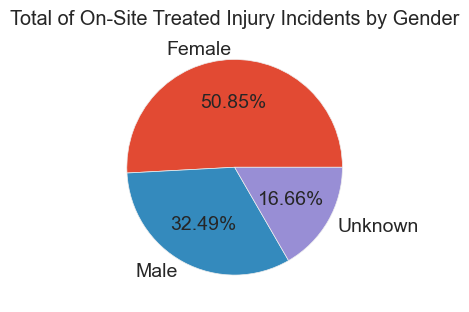

In [17]:
# Aplicando o tema
style.use('ggplot')
# Criando a figura
fig, ax = plt.subplots(figsize=(5, 3.5))
# Criando o gráfico de pizza com labels e o tamanho da fonte
ax.pie(resultado7["num_acidentes"], labels=resultado7["Victims Sex"], autopct='%1.2f%%', textprops={'fontsize': 14})
# Adicionando um título ao gráfico
ax.set_title('Total of On-Site Treated Injury Incidents by Gender')
# Exibindo o gráfico
plt.show()

 Como vimos anteriormente, as vítimas do sexo feminino representam o maior número de vítimas que receberam tratamento no local do incidente, correspondendo a aproximadamente 51% das vítimas, enquanto que o sexo masculino representa cerca de 33% das vítimas.

## No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?

In [18]:
# Executando consulta SQL
query8 = '''
    SELECT
        strftime('%m', "Date Of Incident") AS mes,
        COUNT(*) AS num_acidentes_Elderly
    FROM 
        df
    WHERE
        "Victims Age" = 'Elderly' AND
        strftime('%Y', "Date Of Incident") = '2017'
    GROUP BY 
        strftime('%m', "Date Of Incident")
    ORDER BY
        mes
            ASC
'''

resultado8 = pysqldf(query8)

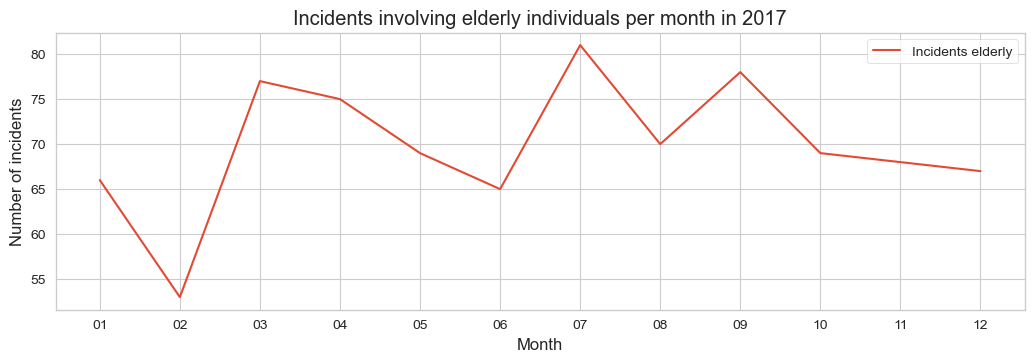

In [19]:
# Definindo o tema
sns.set_style("whitegrid")
# Criando o gráfico
fig, ax = plt.subplots(figsize=(12.5, 3.6))
ax.plot(resultado8['mes'], resultado8['num_acidentes_Elderly'])
# Definindo o título e rótulos nos eixos
ax.set_title('Incidents involving elderly individuals per month in 2017')
ax.set_xlabel('Month')
ax.set_ylabel('Number of incidents')
# Adicionando legenda
ax.legend(['Incidents elderly'])

plt.show()

 O mês que apresentou o maior número de incidentes envolvendo indivíduos idosos foi julho, com mais de 80 vítimas. Já o mês com o menor número de incidentes registrados com idosos foi fevereiro.

## Considerando o Operador qual a distribuição de incidentes ao longo do tempo?

In [20]:
# Executando consulta SQL
query9 = '''
    SELECT
        "Operator",
        strftime('%m', "Date Of Incident") AS mes,
        strftime('%Y', "Date Of Incident") AS mes,
        COUNT(*) AS num_acidentes
    FROM 
        df
    GROUP BY 
        "Operator"
    ORDER BY
        num_acidentes
            DESC
   
'''

resultado9 = pysqldf(query9)

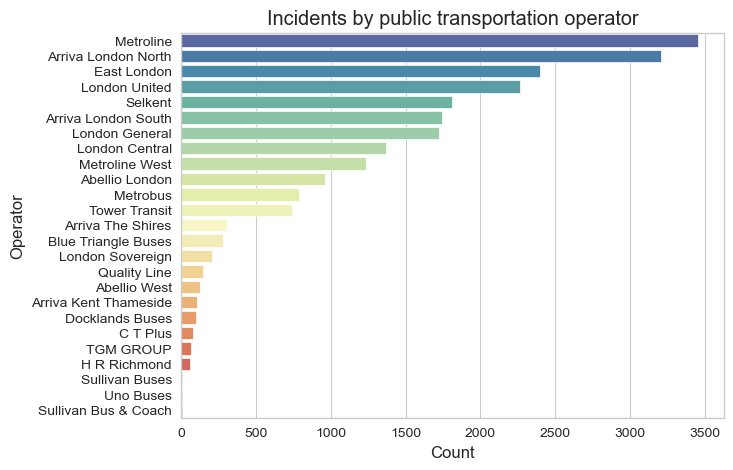

In [21]:
# Criando o gráfico de barras horizontais
plt.subplots(figsize=(7, 5))
sns.set_style("whitegrid")
sns.barplot(x='num_acidentes', y='Operator', data=resultado9, palette='Spectral_r')
# Adicionando rótulos e título
plt.xlabel('Count')
plt.ylabel('Operator')
plt.title('Incidents by public transportation operator')
# Exibindo o gráfico
plt.show()

Observando a distribuição dos incidentes ao longo do tempo, é possível perceber que a maioria dos incidentes ocorrem com os operadores Metroline e Arriva London North, enquanto que os com menor número de vítimas são Sullivan Bus & Coach e Uno Buses.

## Qual o tipo de incidente mais comum com ciclistas?

In [22]:
# Executando consulta SQL
query10 = '''
    SELECT
        "Incident Event Type",
        COUNT(*) AS num_acidentes
    FROM 
        df
    WHERE
        "Victim Category" = 'Cyclist'
    GROUP BY 
        "Incident Event Type"
   
'''

resultado10 = pysqldf(query10)

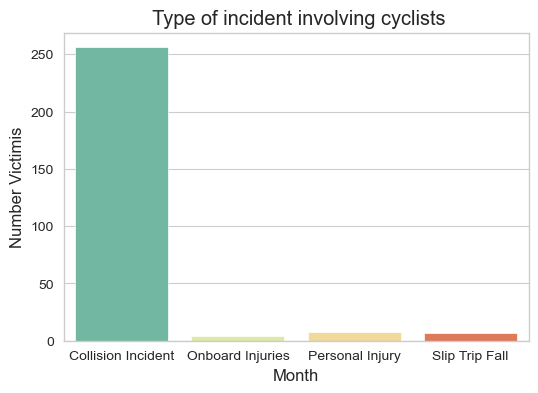

In [23]:
# Criando o gráfico
plt.subplots(figsize=(6, 4))
sns.set_style("whitegrid")
sns.barplot(x='Incident Event Type', y='num_acidentes', data=resultado10, palette='Spectral_r')
# Adicionando rótulos e título
plt.title(' Type of incident involving cyclists')
plt.xlabel('Month')
plt.ylabel('Number Victimis')
# Exibindo o gráfico
plt.show()

Ao observar o gráfico acima, fica claro que a maioria dos acidentes envolvendo ciclistas são colisões. Ou seja, quando ocorre um acidente envolvendo um ciclista, há uma grande possibilidade de que esse acidente seja uma colisão.

# Conclusão

Este projeto tem como objetivo analisar dados de acidentes no transporte público, visando compreender os tipos de acidentes mais frequentes, a faixa etária mais afetada e as características das vítimas. Os resultados da análise mostraram que a maioria das vítimas são mulheres, e que os acidentes mais frequentes são escorregões, tropeços e quedas. O ano de 2017 teve um número maior de incidentes em comparação com os anos anteriores, com picos em junho e julho. A análise desses dados pode ser útil para o desenvolvimento de medidas preventivas mais eficazes para garantir a segurança dos usuários do transporte público.